In [26]:
import matplotlib.pyplot as plt
from math import *
import numpy as np

# 멤리스터

### Memristance
- Roff = 250kohm, Coff=4e-06
- Ron = 2.5kohm, Con=4e-04
### Changed by dx/dt = g(V(t))*f(x)

In [46]:
interval = 0.01 # The base time of the code(구분구적법을 수행할 때 필요함)

In [47]:
# 3x3 memristor crossbar
# 전압으로 MEMRISTOR 저
class Memristor:
    def __init__(self, name):
        self.name = name
        self.x = 0.1
        self.xp = 0.1
        self.xn = 0.2
        self.vp = 1.5
        self.vn = 0.7
        self.alphap = 6
        self.alphan = 4
        self.a1 = 4e-4
        self.a2 = 3e-4
        self.ap = 0.032
        self.an = 0.001
        self.b = 1.0
        
        self.gf = 0.0
        
        self.interval = interval
        self.conductance = 0
        self.resistance = 0
    
    def change_x(self, V):
        if V >= 0:
            if self.x >= self.xp:
                self.f = exp(-self.alphap*(self.x - self.xp)) * (((self.xp - self.x)/(1 - self.xp)) + 1)
            else:
                self.f = 1.0
        elif V < 0:
            if self.x <= (1 - self.xn):
                self.f = exp(self.alphan*(self.x + self.xn - 1.0)) * (self.x/(1-self.xn))
            else:
                self.f = 1.0
            
        if V > self.vp:
            self.g = self.ap * (exp(V)-exp(self.vp))
        elif V < -self.vn:
            self.g = -self.an * (exp(-V)-exp(self.vn))
        else:
            self.g = 0
            
        self.gf = self.f * self.g
        self.x += self.gf * self.interval
    
    def activate(self, V):
        self.change_x(V)
        
        if V >= 0:
            curr = self.a1 * self.x * sinh(self.b * V)
        else:
            curr = self.a2 * self.x * sinh(self.b * V)
        
        try: self.resistance = V / curr
        except ZeroDivisionError as e:
            print(e)
            
        try: self.conductance = 1 / self.resistance
        except ZeroDivisionError as e:
            print(e)
            
        return curr

In [48]:
mem_1 = Memristor('mem_1')

In [49]:
base_time = np.arange(0.1, 30*pi, mem_1.interval)

In [50]:
input_volt = []
for t in base_time:
    input_volt.append(4.0 * sin(t/15))

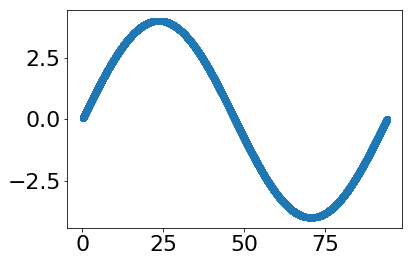

In [51]:
plt.scatter(base_time, input_volt)

In [52]:
output = []
for V in input_volt:
    curr = mem_1.activate(V)
    output.append(curr)

In [53]:
output = np.array(output)
output = output 

Text(0.5,0,'Voltage(V)')

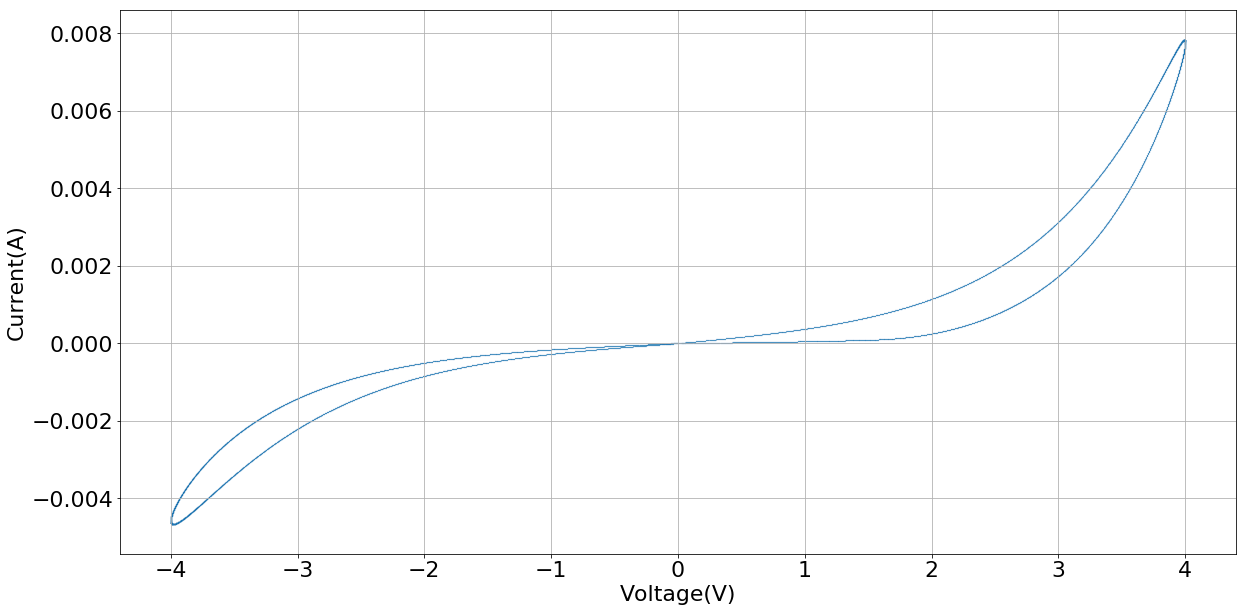

In [55]:
plt.figure(figsize=(20,10))
plt.grid()
plt.scatter(input_volt, output, s=0.02)
plt.ylabel('Current(A)')
plt.xlabel('Voltage(V)')

### For presentation

In [12]:
mem_2 = Memristor("mem_2")

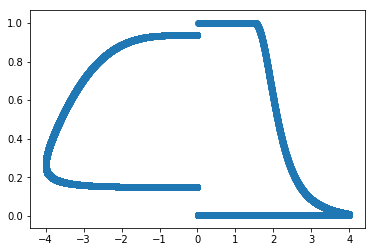

In [13]:
output_2 = []
for V in input_volt:
    mem_2.activate(V)
    output_2.append(mem_2.f)
    
output_2 = np.array(output_2)
plt.scatter(input_volt, output_2)

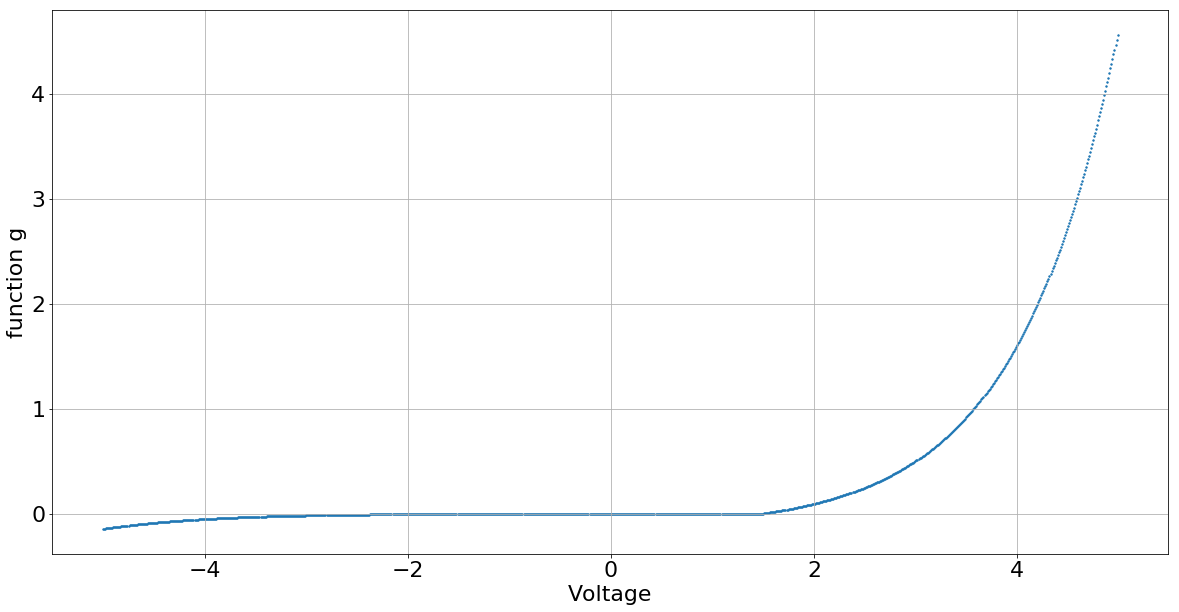

In [20]:
input_volt_2 = np.arange(-5.0, 5.0, interval)

def function_g(V):
    if V > 1.5:
            g = 0.032 * (exp(V)-exp(1.5))
    elif V < -0.7:
        g = -0.001 * (exp(-V)-exp(0.7))
    else:
        g = 0
    return g

output = []
for V in input_volt_2:
    output.append(function_g(V))

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.xlabel('Voltage')
plt.ylabel('function g')
plt.grid()
plt.scatter(input_volt_2, output, s=2.0)

In [ ]:
self.x = 0.1
        self.xp = 0.1
        self.xn = 0.2
        self.vp = 1.5
        self.vn = 0.7
        self.alphap = 6
        self.alphan = 4
        self.a1 = 4e-4
        self.a2 = 3e-4
        self.ap = 0.032
        self.an = 0.001
        self.b = 1.0
        
        self.gf = 0.0

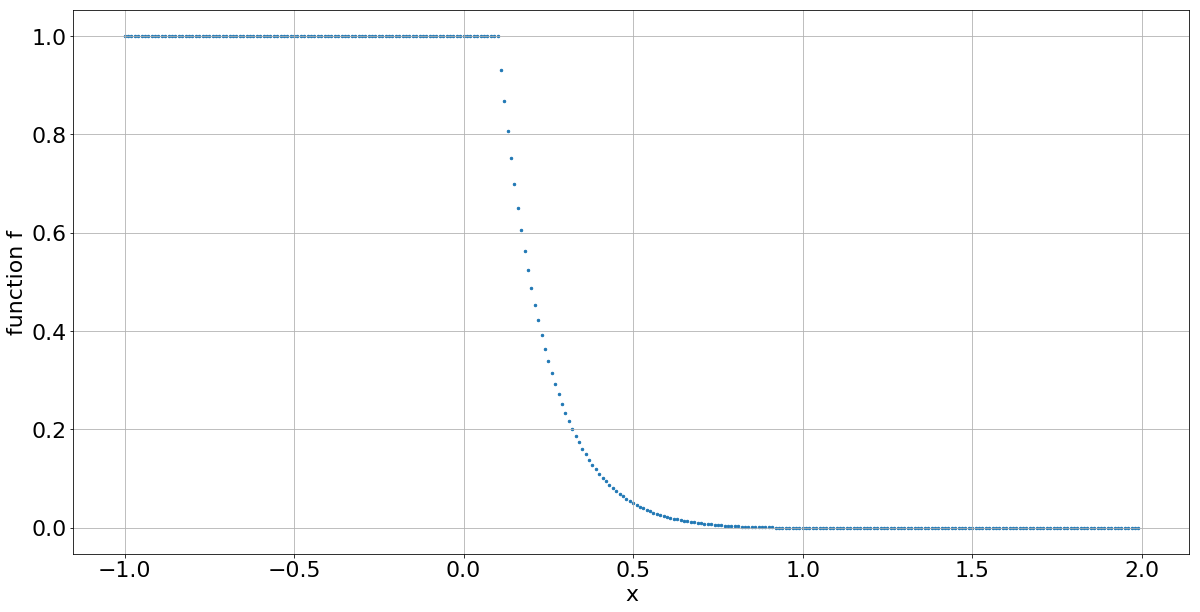

In [24]:
input_x = np.arange(-1.0, 2.0, interval)

def function_f(x):
    if V >= 0:
        if x >= 0.1:
            f = exp(-6*(x - 0.1)) * (((0.1 - x)/(1 - 0.1)) + 1)
        else:
            f = 1.0
    elif V < 0:
        if x <= (1 - 0.2):
            f = exp(4*(x + 0.2 - 1.0)) * (x/(1-0.2))
        else:
            f = 1.0
    return f
            
output_2 = []
for x in input_x:
    output_2.append(function_f(x))

plt.figure(figsize=(20,10))
plt.xlabel('x')
plt.ylabel('function f')
plt.grid()
plt.scatter(input_x, output_2, s=6.0)